In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [92]:
#Load the data
data = tf.keras.datasets.fashion_mnist

In [93]:
(X_train, y_train), (X_test, y_test) = data.load_data()

In [94]:
#Scaling
X_train = X_train/255
X_test = X_test/255

In [95]:
#Reshaping
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [96]:
k = len(set(y_train))

In [97]:
#Model Building
model = Sequential()
model.add(Flatten())
model.add(Dense(128, input_shape=(784,), activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(k, activation="softmax"))

In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["sparse_categorical_accuracy"])

In [99]:
'''
import math
def calculate_spe(y):
  return int(math.ceil((1. * y)/batch_size))
  '''

'\nimport math\ndef calculate_spe(y):\n  return int(math.ceil((1. * y)/batch_size))\n  '

In [100]:
'''
batch_size=32
spe = calculate_spe(X_train.shape[0])
'''

'\nbatch_size=32\nspe = calculate_spe(X_train.shape[0])\n'

In [101]:
r = model.fit(X_train,y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5122 - sparse_categorical_accuracy: 0.8186 - val_loss: 0.4273 - val_sparse_categorical_accuracy: 0.8448
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3789 - sparse_categorical_accuracy: 0.8623 - val_loss: 0.3673 - val_sparse_categorical_accuracy: 0.8706
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3398 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.3757 - val_sparse_categorical_accuracy: 0.8621
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3178 - sparse_categorical_accuracy: 0.8834 - val_loss: 0.3406 - val_sparse_categorical_accuracy: 0.8769
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.8902 - val_loss: 0.3347 - val_sparse_categorical_accuracy: 0.8780
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2822 - spars

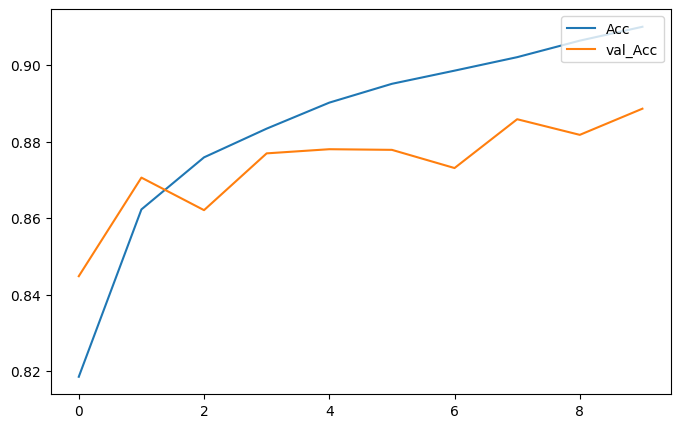

In [105]:
plt.figure(figsize=(8,5))
plt.plot(r.history["sparse_categorical_accuracy"], label="Acc")
plt.plot(r.history["val_sparse_categorical_accuracy"], label="val_Acc")
plt.legend(loc="upper right")
plt.show()